<a href="https://colab.research.google.com/github/NooshinS/Machine-Learning/blob/main/Copy_of_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('Heart.csv')

# Data preparation

In [ ]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.0,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,130.092409,242.993399,0.0,0.528053,149.917492,0.326733,0.969142,1.399340,0.465347,2.326733,0.544554
std,9.082101,0.466011,1.032052,15.130275,44.721507,0.0,0.525860,22.452816,0.469794,1.041656,0.616226,0.708010,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.0,0.000000,135.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.0,1.000000,153.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,272.000000,0.0,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


In [ ]:
#Find missing values
data.isnull().sum()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0.0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0.0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0.0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0.0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1.0,0.6,2,0.0,2.0,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0.0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0.0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0.0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0.0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1.0,0.6,2,0.0,2.0,1


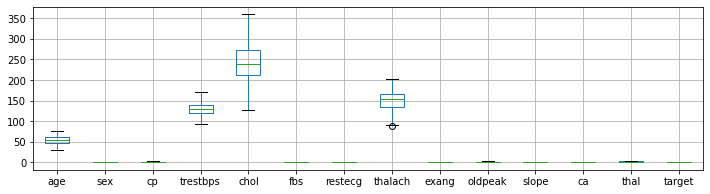

In [ ]:
#Outliers
plt.figure(figsize=(12,3))
data.boxplot()


In [ ]:
#Filling the outliers
for x in ['trestbps','chol','fbs','thalach','exang','thal','ca','oldpeak']:
  q75,q25=np.percentile(data.loc[:,x],[75,25])
  intr_qr= q75-q25
  max= q75+(1.5*intr_qr)
  min= q25-(1.5*intr_qr)
  data.loc[data[x]<min,x]=np.nan
  data.loc[data[x]>max,x]=np.nan
data.isnull().sum()
median= data.median()
data.fillna(median, inplace=True)
data.isnull().sum()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0.0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0.0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0.0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0.0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1.0,0.6,2,0.0,2.0,1


#Data analysis

In [ ]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0.0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0.0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0.0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0.0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1.0,0.6,2,0.0,2.0,1


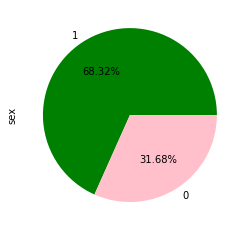

In [ ]:
#Define the percentage of man and woman
data['sex'].value_counts().plot.pie(autopct="%2.2f%%",colors = ['green', 'pink'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0.0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0.0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0.0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0.0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1.0,0.6,2,0.0,2.0,1


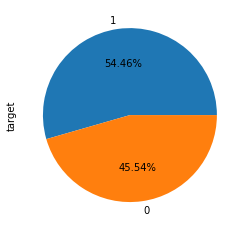

In [ ]:
#define the percentage of dependent variable (Balacing of dataset)
data['target'].value_counts().plot.pie(autopct="%2.2f%%")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0.0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0.0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0.0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0.0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1.0,0.6,2,0.0,2.0,1


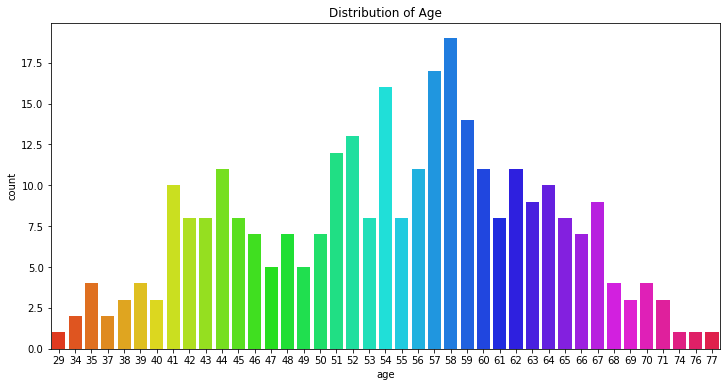

In [ ]:
#Define the age range
plt.figure(figsize=(12,6))
sns.countplot(data['age'],palette='hsv')
plt.title("Distribution of Age")


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0.0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0.0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0.0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0.0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1.0,0.6,2,0.0,2.0,1


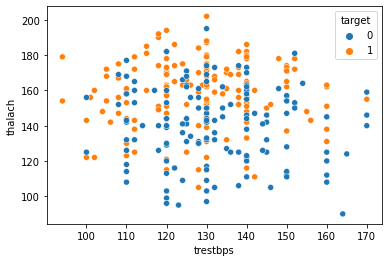

In [ ]:
#Maximum blood pressure and heart rate
sns.scatterplot(x='trestbps',y='thalach', hue='target',data =data)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0.0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0.0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0.0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0.0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1.0,0.6,2,0.0,2.0,1


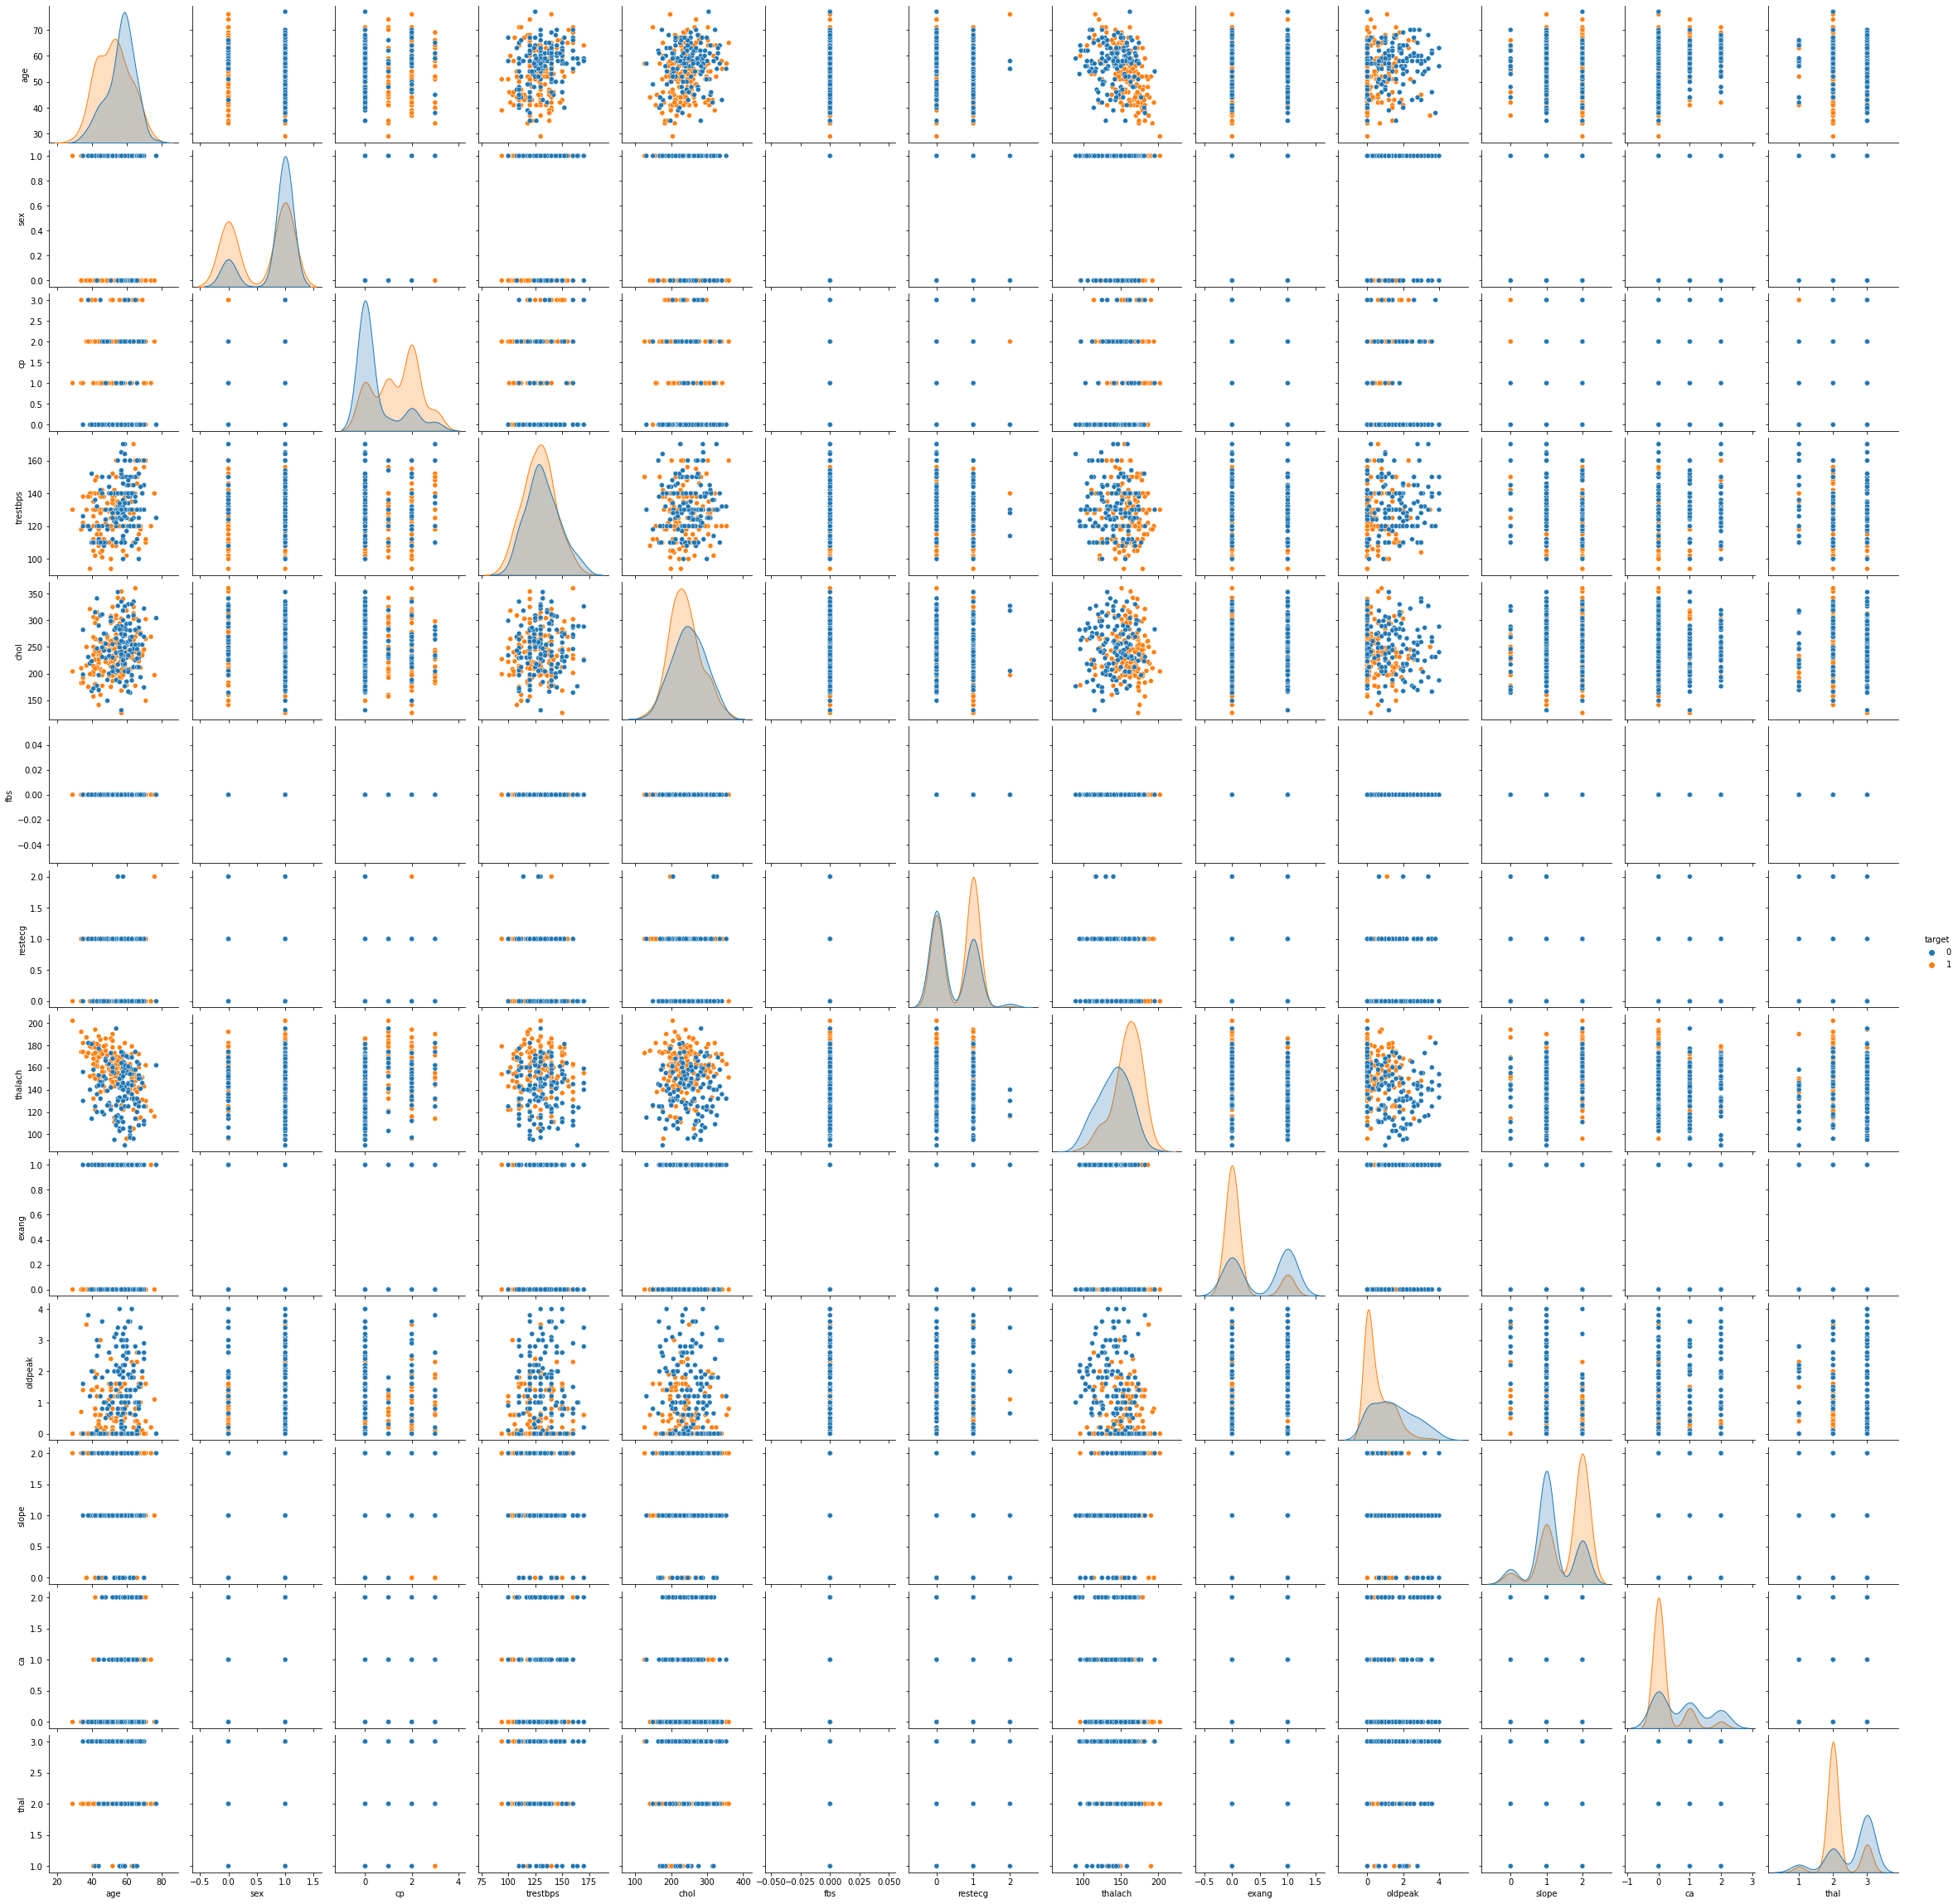

In [ ]:
sns.pairplot(data ,hue ='target', vars =['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])


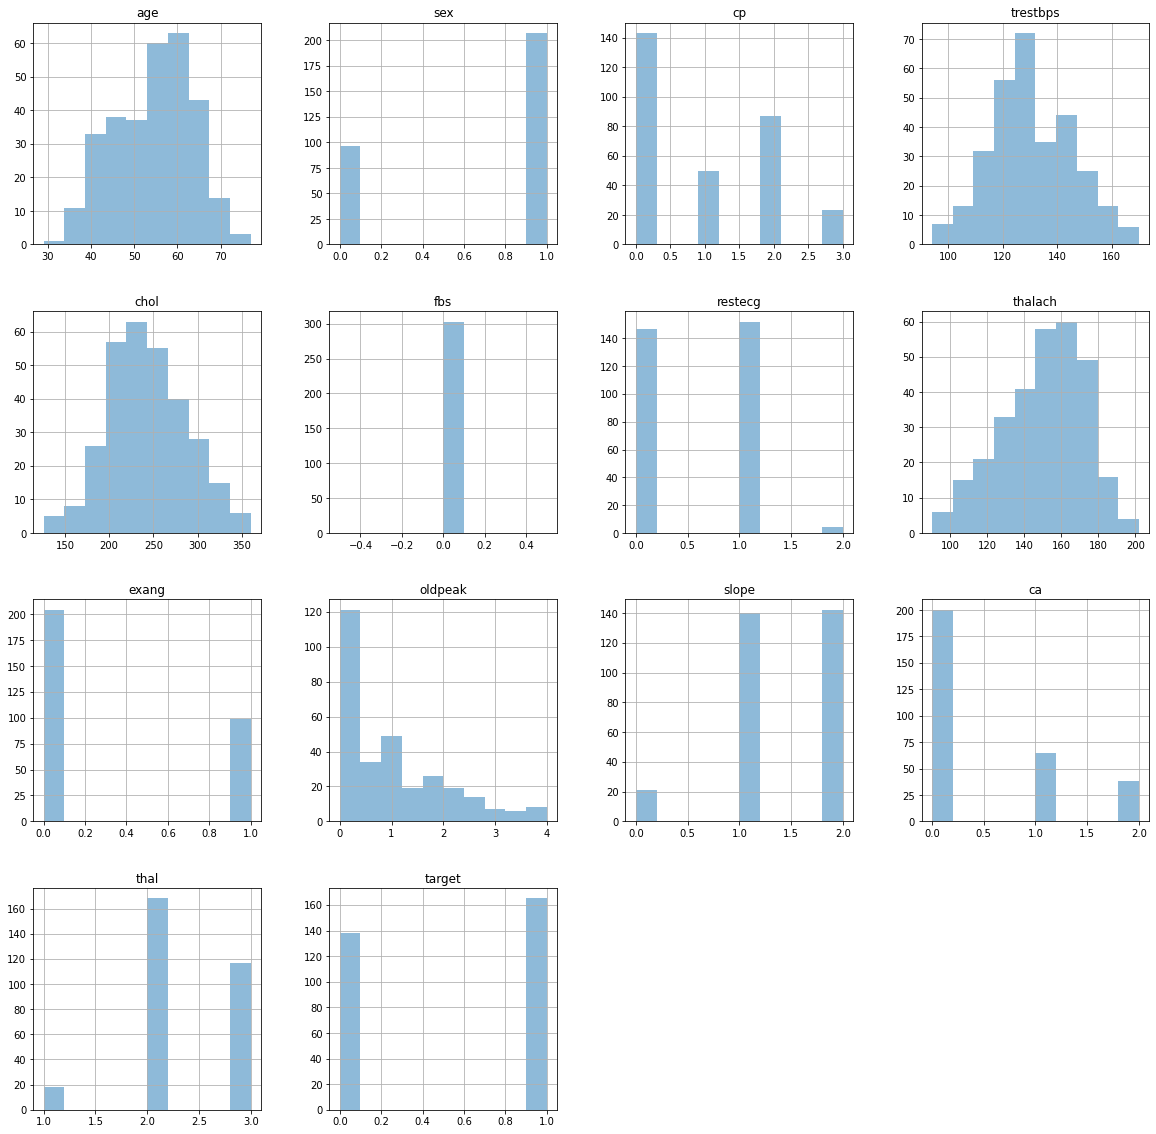

In [ ]:
#Histogram of data
data.hist(alpha=0.5, figsize=(20, 20))
plt.show()


#Building machine learning models

In [ ]:
#Split the data
x=data.iloc[ : , :-1].values
y=data.iloc[ : ,-1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0 )

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [ ]:
#Train with Logistic regression
from sklearn.linear_model import LogisticRegression
classifierL= LogisticRegression(random_state=0)
classifierL.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Train with decision tree
from sklearn.tree import DecisionTreeClassifier
classifierD=DecisionTreeClassifier(criterion="entropy", random_state=0)
classifierD.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicting
y_predL=classifierL.predict(x_test)
y_predD=classifierD.predict(x_test)
print(np.concatenate((y_predL.reshape(len(y_predL),1), y_test.reshape(len(y_test),1)),1))
print(np.concatenate((y_predD.reshape(len(y_predD),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]
[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


Confusion matrix L [[23  4]
 [ 2 32]]
Confusion matrix D [[23  4]
 [ 6 28]]
Accuracy-L 0.9016393442622951
Accuracy-D 0.8360655737704918
ROCAUC scoreL: 0.8965141612200436
ROCAUC scoreD: 0.8376906318082789
F1 scoreL: 0.9142857142857143
F1 scoreD: 0.8484848484848485


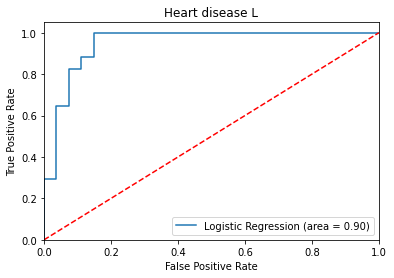

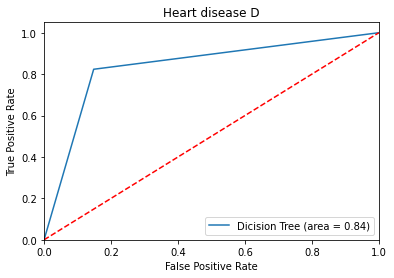

In [ ]:
#Accuracy and Confusion matrix and ROC curve
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve
cmL=confusion_matrix(y_test, y_predL)
cmD=confusion_matrix(y_test, y_predD)
print('Confusion matrix L',cmL)
print('Confusion matrix D',cmD)
print('Accuracy-L',accuracy_score(y_predL, y_test))
print('Accuracy-D', accuracy_score(y_predD, y_test))
print('ROCAUC scoreL:',roc_auc_score(y_test, y_predL))
print('ROCAUC scoreD:',roc_auc_score(y_test, y_predD))
print('F1 scoreL:',f1_score(y_test, y_predL))
print('F1 scoreD:',f1_score(y_test, y_predD))
logit_roc_aucL = roc_auc_score(y_test, y_predL)
fpr, tpr, thresholdsL = roc_curve(y_test, classifierL.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_aucL)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease L')
plt.legend(loc="lower right")
plt.show()
logit_roc_aucD = roc_auc_score(y_test, y_predD)
fpr, tpr, thresholdsD = roc_curve(y_test, classifierD.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Dicision Tree (area = %0.2f)' % logit_roc_aucD)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease D')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Make Dataframe
Accuracy=[0.901, 0.836]
F1score=[0.914, 0.848]
ROCAUCscore=[0.896, 0.837]
results=pd.DataFrame({'Models':['Logistic Regression', 'Decision Tree'],'Accuracy':[0.901, 0.836],'F1score':[0.914, 0.848],'ROCAUCscore':[0.896, 0.837] }, columns=['Models','Accuracy','F1score','ROCAUCscore'])
results

,Models,Accuracy,F1score,ROCAUCscore
0,Logistic Regression,0.901,0.914,0.896
1,Decision Tree,0.836,0.848,0.837
